# Face Detection 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
#Using haarcascade files with cv2
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
smile_cascade=cv2.CascadeClassifier("haarcascade_smile.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

# Face , smile and eyes detection

In [4]:

def find(img):
   
    #using the cascade classifiers to identify the features in img whether img is a picture or video stream from webcam
    faces=face_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)
    eye=eye_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=10)
    smile=smile_cascade.detectMultiScale(img,scaleFactor=1.8,minNeighbors=20)
    #Draw blue rectangle for face
    for x,y,w,h in faces:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
   #Draw black rectangles for eyes 
    for x,y,w,h in eye:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,0),2)
   #Draw blue rectangle for face 
    for x,y,w,h in smile:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)

    
    return img

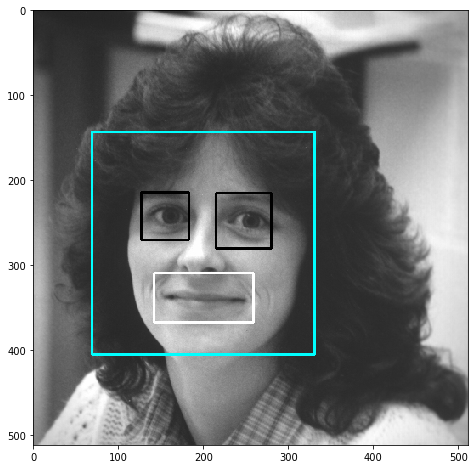

In [5]:
#selection of image
img=cv2.imread("woman_darkhair.tif",1)
#conversion of image channels
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#call to the function
plt.figure(figsize=(8 , 8))
plt.imshow(find(img))
plt.show()


# WebCam Face Tracking


In [6]:
#for this sir please use proper light else it will detect wrong points
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()     
    canvas = find(frame)                          
    cv2.imshow('videos' ,canvas)
    if cv2.waitKey(1) & 0xff == ord('q'):                
        break
video_capture.release()                                 
cv2.destroyAllWindows() 
#if you don't see window, check for it running in background